In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Cleaning Process

In [2]:
df = pd.read_csv('BAJAJFINSV_minute.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df = df.sort_values('date').reset_index(drop = True)

In [5]:
df = df.dropna()

In [8]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

## Engineering Additional features

In [9]:
# Simple moving Average SME & Exponential Moving Average

df['sma_10'] = df['close'].rolling(window=10).mean()  # Simple Moving Average
df['ema_10'] = df['close'].ewm(span=10, adjust=False).mean()  # Exponential MA

In [10]:
# Price rate of Change

df['roc_10'] = df['close'].pct_change(periods=10) * 100

In [11]:
# Volume Spikes comapred to last 10 days

df['avg_volume_10'] = df['volume'].rolling(window=10).mean()
df['volume_spike'] = (df['volume'] > 1.5 * df['avg_volume_10']).astype(int)

In [12]:
df

,date,open,high,low,close,volume,sma_10,ema_10,roc_10,avg_volume_10,volume_spike
0,2015-02-02 09:15:00,144.30,145.05,144.30,145.05,50,NaN,145.050000,NaN,NaN,0
1,2015-02-02 09:16:00,145.05,145.05,143.30,143.30,810,NaN,144.731818,NaN,NaN,0
2,2015-02-02 09:17:00,143.30,144.00,143.30,144.00,150,NaN,144.598760,NaN,NaN,0
3,2015-02-02 09:18:00,144.00,144.30,144.00,144.30,200,NaN,144.544440,NaN,NaN,0
4,2015-02-02 09:19:00,144.30,144.95,144.30,144.95,180,NaN,144.618178,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
927138,2025-02-07 15:25:00,1795.95,1798.00,1795.45,1798.00,4813,1796.865,1797.006881,0.033382,10434.1,0
927139,2025-02-07 15:26:00,1797.95,1797.95,1795.50,1796.90,6919,1796.760,1796.987448,-0.058400,6422.0,0
927140,2025-02-07 15:27:00,1796.20,1799.75,1795.85,1798.70,2909,1796.835,1797.298821,0.041714,6430.0,0
927141,2025-02-07 15:28:00,1797.75,1800.30,1797.65,1798.50,7106,1797.060,1797.517217,0.125261,6525.8,0


In [13]:
df.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
sma_10            9
ema_10            0
roc_10           10
avg_volume_10     9
volume_spike      0
dtype: int64

In [14]:
df.dropna()

,date,open,high,low,close,volume,sma_10,ema_10,roc_10,avg_volume_10,volume_spike
10,2015-02-02 09:25:00,144.00,144.00,143.85,143.85,680,144.300,144.396111,-0.827301,419.0,1
11,2015-02-02 09:26:00,143.85,143.85,143.80,143.80,20,144.350,144.287727,0.348918,340.0,0
12,2015-02-02 09:27:00,143.80,143.80,143.40,143.40,100,144.290,144.126322,-0.416667,335.0,0
13,2015-02-02 09:28:00,143.40,143.40,142.95,143.00,650,144.160,143.921536,-0.900901,380.0,1
14,2015-02-02 09:29:00,143.00,143.00,142.90,143.00,210,143.965,143.753984,-1.345291,383.0,0
...,...,...,...,...,...,...,...,...,...,...,...
927138,2025-02-07 15:25:00,1795.95,1798.00,1795.45,1798.00,4813,1796.865,1797.006881,0.033382,10434.1,0
927139,2025-02-07 15:26:00,1797.95,1797.95,1795.50,1796.90,6919,1796.760,1796.987448,-0.058400,6422.0,0
927140,2025-02-07 15:27:00,1796.20,1799.75,1795.85,1798.70,2909,1796.835,1797.298821,0.041714,6430.0,0
927141,2025-02-07 15:28:00,1797.75,1800.30,1797.65,1798.50,7106,1797.060,1797.517217,0.125261,6525.8,0


In [15]:
df.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
sma_10            9
ema_10            0
roc_10           10
avg_volume_10     9
volume_spike      0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

date             0
open             0
high             0
low              0
close            0
volume           0
sma_10           0
ema_10           0
roc_10           0
avg_volume_10    0
volume_spike     0
dtype: int64

In [ ]:
# No Normalization or Standardization is required as we are going to use Isolation Forest

## Isolation Forest

In [32]:
features = ['sma_10','roc_10','volume_spike']
x = df[features]

In [33]:
# Check for NaNs
print("NaNs present?", x.isna().sum())



NaNs present? sma_10          0
roc_10          0
volume_spike    0
dtype: int64


In [39]:
# Check for Infs
print("Infs present?", np.isinf(x).sum())

Infs present? sma_10          0
roc_10          0
volume_spike    0
dtype: int64


In [35]:
# Replace inf/-inf with NaN
x.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\Groot\AppData\Local\Temp\ipykernel_7816\2445043161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace([np.inf, -np.inf], np.nan, inplace=True)


In [36]:
# Drop rows with any NaN values
x.dropna(inplace=True)

C:\Users\Groot\AppData\Local\Temp\ipykernel_7816\3448593522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.dropna(inplace=True)


In [37]:
x.isnull().sum()

sma_10          0
roc_10          0
volume_spike    0
dtype: int64

In [38]:
x.shape

(927132, 3)

In [40]:
from sklearn.ensemble import IsolationForest

In [41]:
iso_model = IsolationForest(contamination=0.01, random_state=42)
df.loc[x.index, 'anomaly'] = iso_model.fit_predict(x)

C:\Users\Groot\AppData\Local\Temp\ipykernel_7816\3112600147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[x.index, 'anomaly'] = iso_model.fit_predict(x)


In [42]:
# Map to binary: -1 = anomaly, 1 = normal
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

C:\Users\Groot\AppData\Local\Temp\ipykernel_7816\359408759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})


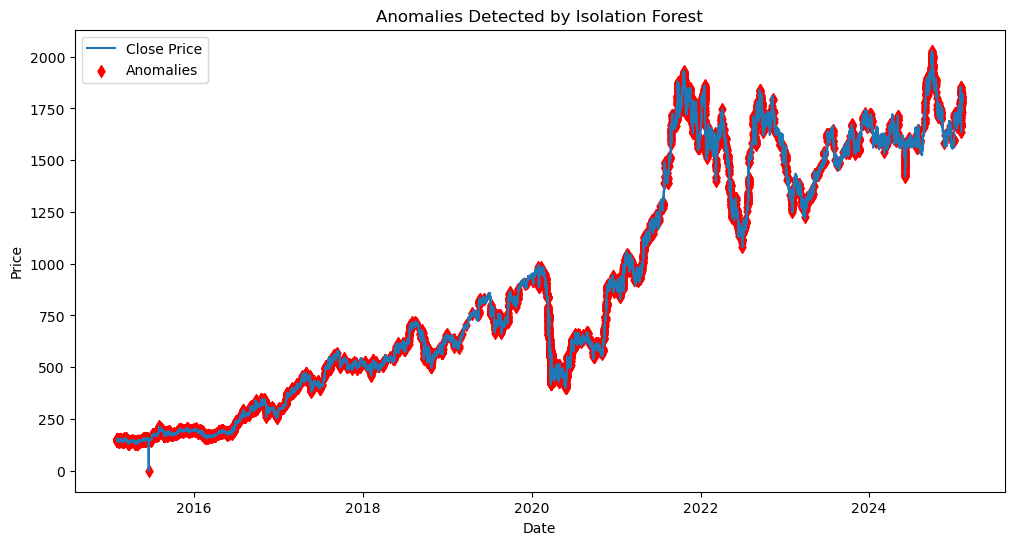

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.scatter(df[df['anomaly'] == 1]['date'], df[df['anomaly'] == 1]['close'], 
            color='red', label='Anomalies', marker='d')
plt.legend()
plt.title("Anomalies Detected by Isolation Forest")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()